# Divorce Predictor

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sb

Import divorce data set

In [2]:
df = pd.read_csv("divorce.csv")


Pearson Correlation

<AxesSubplot:>

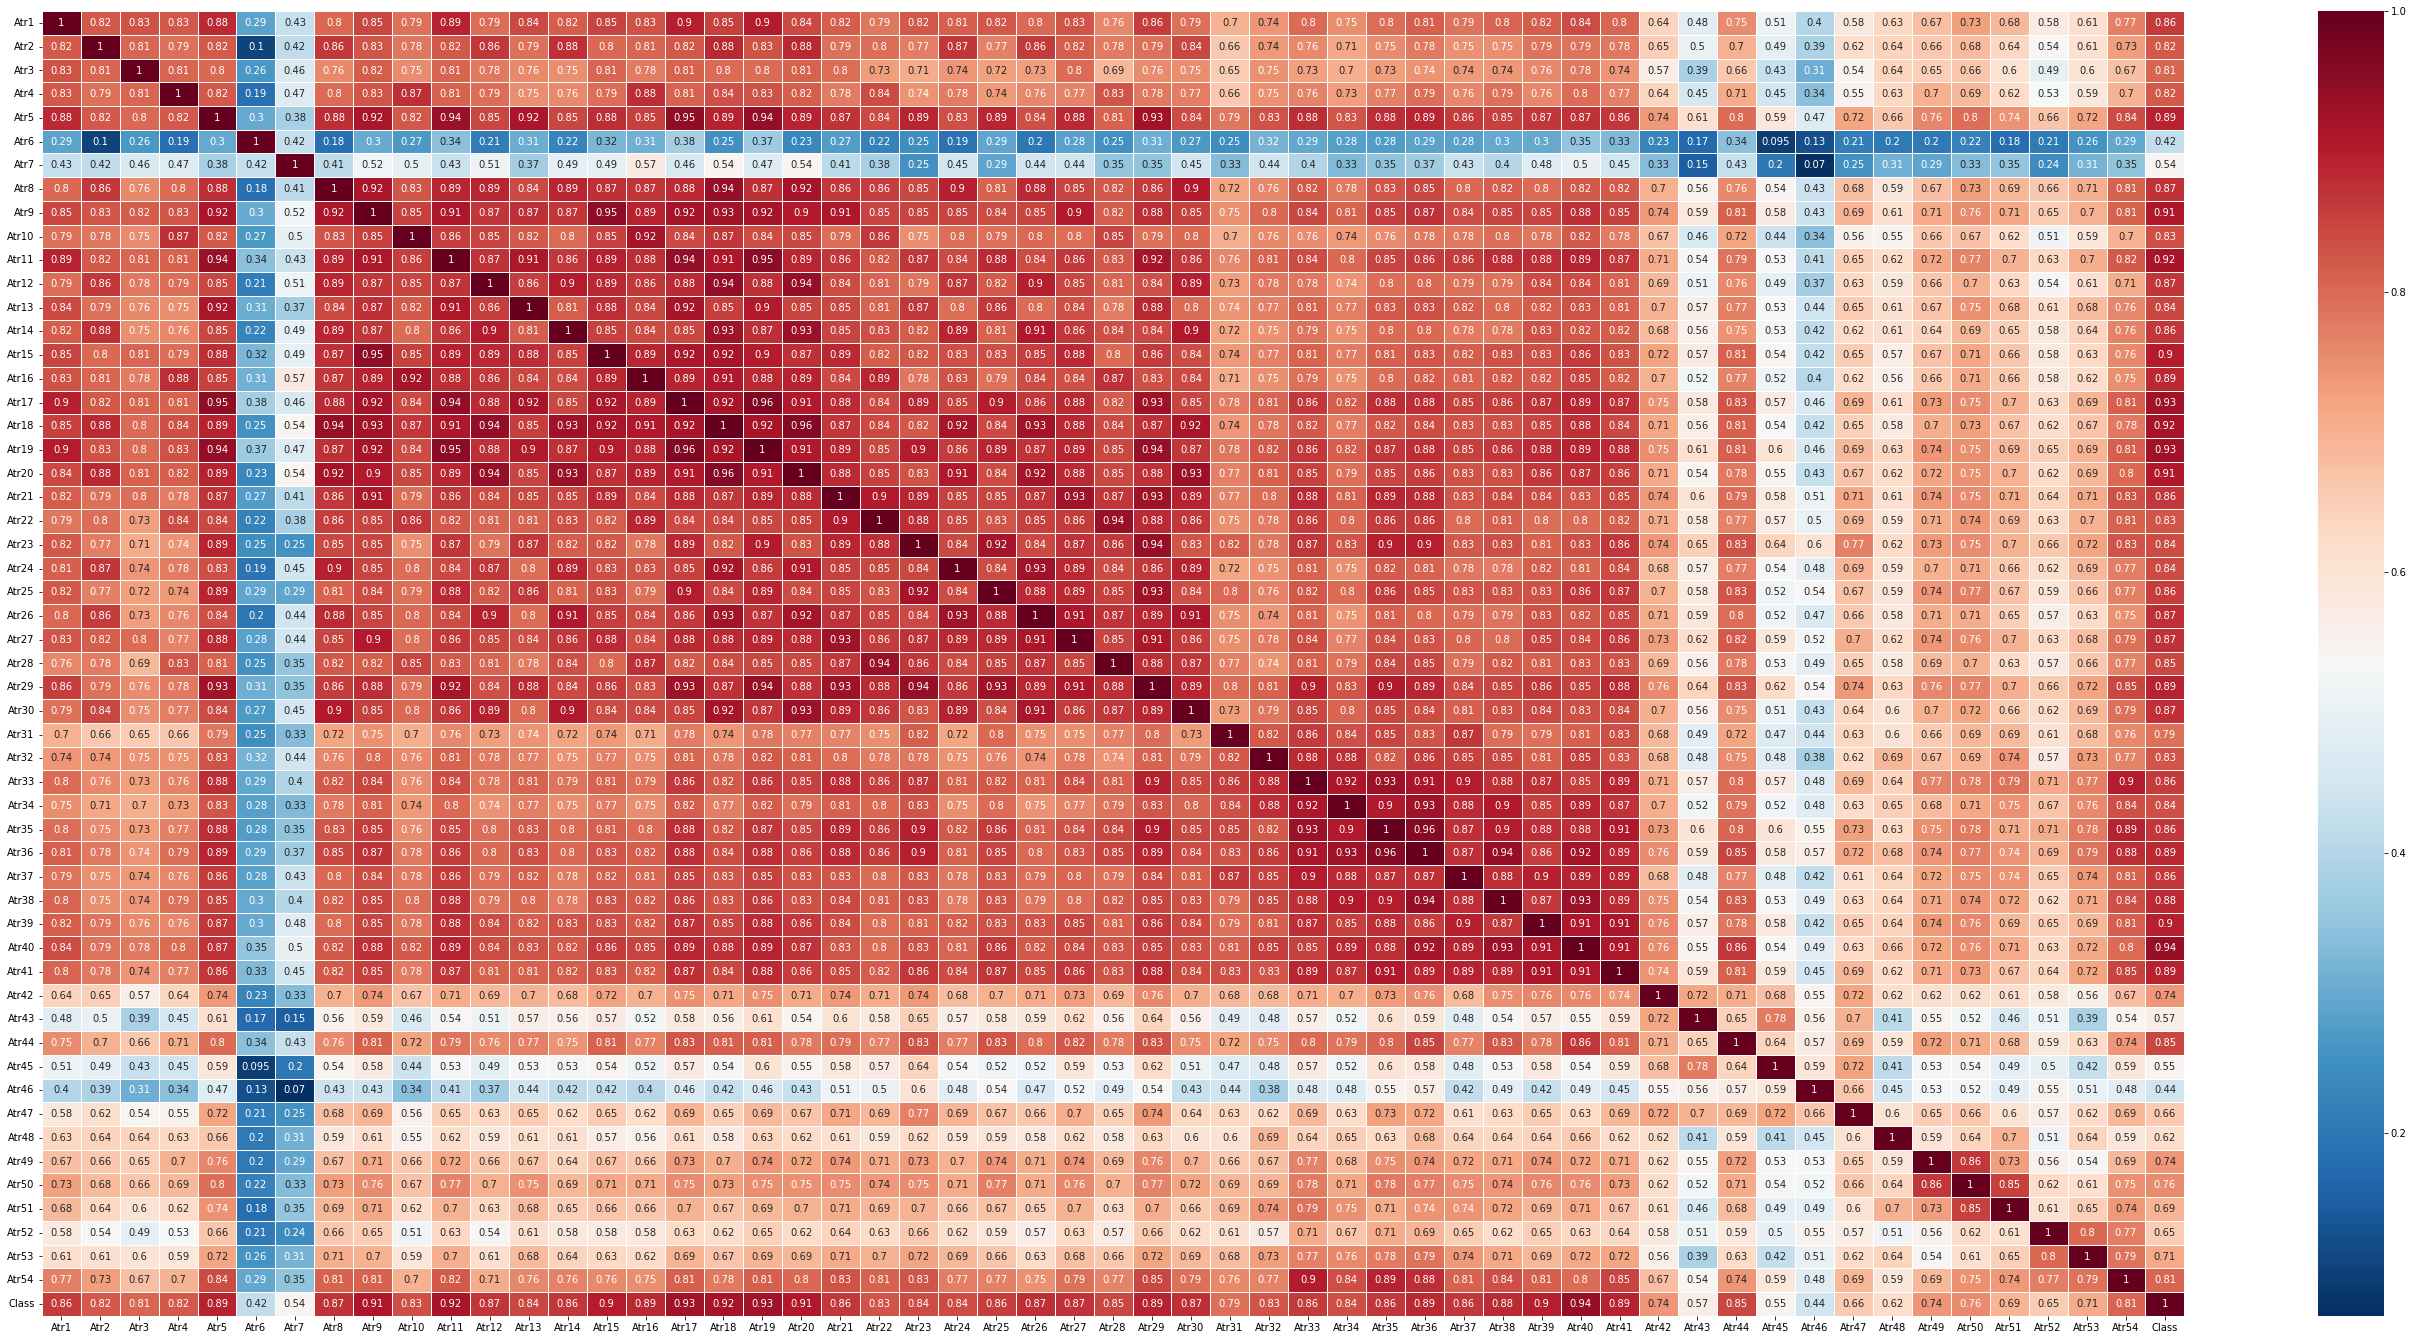

In [3]:
pearsoncorr = df.corr(method='pearson')
plt.figure(figsize=(48,24))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=.5)

#Higest correlation: 17, 19, 20, 18

## Knn

[[29  0]
 [ 2 20]]
0.9607843137254902
[[23  0]
 [ 1 27]]
0.9803921568627451
[[24  0]
 [ 3 24]]
0.9411764705882353
[[25  0]
 [ 0 26]]
1.0
[[29  0]
 [ 1 21]]
0.9803921568627451
[[27  0]
 [ 0 24]]
1.0
[[29  0]
 [ 2 20]]
0.9607843137254902
[[28  0]
 [ 1 22]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[26  0]
 [ 1 24]]
0.9803921568627451
[[25  0]
 [ 1 25]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[30  0]
 [ 0 21]]
1.0
[[29  0]
 [ 2 20]]
0.9607843137254902
[[23  0]
 [ 1 27]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[25  0]
 [ 0 26]]
1.0
[[27  0]
 [ 0 24]]
1.0
[[28  0]
 [ 1 22]]
0.9803921568627451
[[28  0]
 [ 1 22]]
0.9803921568627451
[[24  0]
 [ 1 26]]
0.9803921568627451
[[25  0]
 [ 0 26]]
1.0
[[30  0]
 [ 1 20]]
0.9803921568627451
[[22  0]
 [ 1 28]]
0.9803921568627451
[[20  0]
 [ 1 30]]
0.9803921568627451
[[22  0]
 [ 1 28]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[29  0]
 [ 1 21]]
0.9803921568627451
[[25  0]
 [ 1 25]]
0.98039

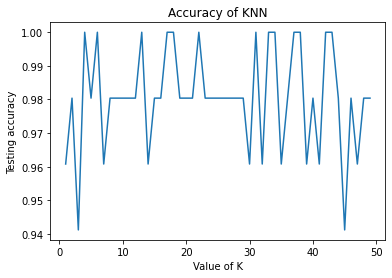

In [4]:
kMax = 50
scores_list = []
scores=[]
k_range = range(1,kMax)
# Set-up x and y axis and divide into training/ testing sets
x= df.loc[:, df.columns != 'Class'].values
y= df["Class"].values

for K in k_range:

    #Training machine model with Knn
    knn = KNeighborsClassifier(n_neighbors=K)
    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    # Print out the scores and confusion matrixs
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    
    #plot knn_cv
plt.plot(range(1, kMax),scores_list)
plt.title("Accuracy of KNN")
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

Cross Validation

In [5]:
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print (cv_scores)
print(f'cv_scores mean: {np.mean(cv_scores)}')

[0.88235294 1.         1.         1.         1.        ]
cv_scores mean: 0.9764705882352942


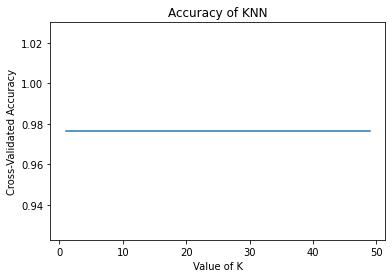

In [6]:
scores_list = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
    #Knn graph
plt.plot(range(1, kMax),scores_list)
plt.title("Accuracy of KNN")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Knn with 4 features

In [7]:
kMax = 50
scores = {}
scores_list = []
x= df.iloc[:, 16:20].values
y= df["Class"].values
for K in range (1,kMax):
    # Set-up x and y axis and divide into training/ testing sets
    
    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)
    
    #Training machine model with Knn
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[K] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    #Print out the scores and confusion matrixs
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
print(cross_val_score(knn,x,y,cv=5))

[[23  0]
 [ 1 27]]
0.9803921568627451
[[26  0]
 [ 1 24]]
0.9803921568627451
[[24  0]
 [ 0 27]]
1.0
[[28  0]
 [ 1 22]]
0.9803921568627451
[[24  0]
 [ 0 27]]
1.0
[[25  0]
 [ 1 25]]
0.9803921568627451
[[25  0]
 [ 0 26]]
1.0
[[25  0]
 [ 1 25]]
0.9803921568627451
[[26  0]
 [ 2 23]]
0.9607843137254902
[[26  0]
 [ 1 24]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[25  0]
 [ 2 24]]
0.9607843137254902
[[23  0]
 [ 3 25]]
0.9411764705882353
[[30  0]
 [ 1 20]]
0.9803921568627451
[[23  0]
 [ 1 27]]
0.9803921568627451
[[28  0]
 [ 1 22]]
0.9803921568627451
[[29  0]
 [ 1 21]]
0.9803921568627451
[[30  0]
 [ 1 20]]
0.9803921568627451
[[27  0]
 [ 1 23]]
0.9803921568627451
[[25  0]
 [ 0 26]]
1.0
[[23  0]
 [ 3 25]]
0.9411764705882353
[[24  0]
 [ 2 25]]
0.9607843137254902
[[23  0]
 [ 3 25]]
0.9411764705882353
[[28  0]
 [ 1 22]]
0.9803921568627451
[[29  0]
 [ 2 20]]
0.9607843137254902
[[22  0]
 [ 0 29]]
1.0
[[30  0]
 [ 1 20]]
0.9803921568627451
[[31  0]
 [ 2 18]]
0.9607843137254902
[[26  0]
 [

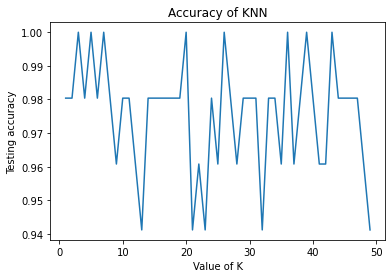

In [8]:
#Knn graph with 4 features
plt.plot(range(1, kMax),scores_list)
plt.title("Accuracy of KNN")
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [9]:
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print (cv_scores)
print(f'cv_scores mean: {np.mean(cv_scores)}')

[0.88235294 1.         1.         1.         1.        ]
cv_scores mean: 0.9764705882352942


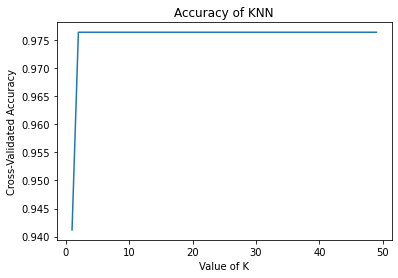

In [10]:
scores_list = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
    #Knn graph
plt.plot(range(1, kMax),scores_list)
plt.title("Accuracy of KNN")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# SVM

In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm, datasets

[0.82352941 1.         1.         1.         1.         1.
 1.         0.82352941 1.         1.        ]


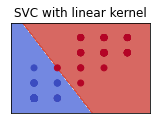

In [12]:
# Set-up x and y axis and divide into training/ testing sets
x = df.iloc[:,17:19].values
y = df["Class"].values
C = 1

svc = svm.SVC(kernel='linear', C=C).fit (x,y)
print(cross_val_score(svc,x,y,cv=10))
x_min, x_max = x[:, 0].min() - 1, x[:, 1].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

plt.subplot (2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace = 0.4)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')
plt.show()

Cross Validation

In [13]:
scores = cross_val_score(svc, x, y, cv=5)
scores
print("%0.2f accuracy witha  standard deviation of %0.2f" % (scores.mean(),scores.std()))

0.94 accuracy witha  standard deviation of 0.06


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
Dmax = 25
scores = {}
scores_list = []

In [15]:
for d in range(1, Dmax):
    X= df.loc[:, df.columns != 'Class'].values
    y= df["Class"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

    #Training machine model with random forest and seeing how max depth affects accuracy
    clf = RandomForestClassifier(max_depth=d)
    clf.fit(X,y)
    y_pred = clf.predict(X_test)
    scores[d] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

[[24  0]
 [ 1 26]]
0.9803921568627451
[[24  0]
 [ 1 26]]
0.9803921568627451
[[29  0]
 [ 0 22]]
1.0
[[23  0]
 [ 0 28]]
1.0
[[23  0]
 [ 0 28]]
1.0
[[27  0]
 [ 0 24]]
1.0
[[27  0]
 [ 0 24]]
1.0
[[29  0]
 [ 0 22]]
1.0
[[25  0]
 [ 0 26]]
1.0
[[26  0]
 [ 0 25]]
1.0
[[28  0]
 [ 0 23]]
1.0
[[23  0]
 [ 0 28]]
1.0
[[21  0]
 [ 0 30]]
1.0
[[26  0]
 [ 0 25]]
1.0
[[25  0]
 [ 0 26]]
1.0
[[33  0]
 [ 0 18]]
1.0
[[23  0]
 [ 0 28]]
1.0
[[26  0]
 [ 0 25]]
1.0
[[24  0]
 [ 0 27]]
1.0
[[30  0]
 [ 0 21]]
1.0
[[24  0]
 [ 0 27]]
1.0
[[27  0]
 [ 0 24]]
1.0
[[26  0]
 [ 0 25]]
1.0
[[23  0]
 [ 0 28]]
1.0


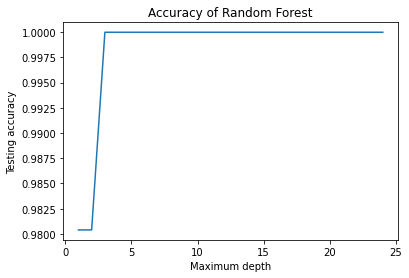

In [16]:
plt.plot(range(1, Dmax),scores_list)
plt.title("Accuracy of Random Forest")
plt.xlabel('Maximum depth')
plt.ylabel('Testing accuracy')  
plt.show()

Cross Validation

In [17]:
clf = RandomForestClassifier(max_depth=3)
rfc_cv = cross_val_score(clf, X, y, cv=5)
print (rfc_cv)
print(f'cv_scores mean: {np.mean(rfc_cv)}')

[0.88235294 1.         1.         1.         1.        ]
cv_scores mean: 0.9764705882352942


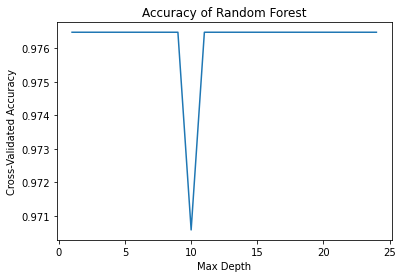

In [18]:
scores_list = []
for d in range(1,Dmax):
    clf = RandomForestClassifier(max_depth=d)
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
    
plt.plot(range(1, Dmax),scores_list)
plt.title("Accuracy of Random Forest")
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Random Forest with 4 features

In [19]:
scores = {}
scores_list = []
for d in range(1, Dmax):
    X= df.iloc[:, 16:20].values
    y= df["Class"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

    #Training machine model with random forest and seeing how max depth affects accuracy
    clf = RandomForestClassifier(max_depth=d)
    clf.fit(X,y)
    y_pred = clf.predict(X_test)
    scores[d] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(cross_val_score(clf,x,y,cv=10))


[[29  0]
 [ 2 20]]
0.9607843137254902
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[28  0]
 [ 1 22]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[22  0]
 [ 0 29]]
1.0
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[30  0]
 [ 0 21]]
1.0
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[30  0]
 [ 0 21]]
1.0
[0.82352941 1.         1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[29  0]
 [ 1 21]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[28  0]
 [ 1 22]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         0.94117647 1.         1.        ]
[[28  0]
 [ 1 22]]
0.9803921568627451
[0.823

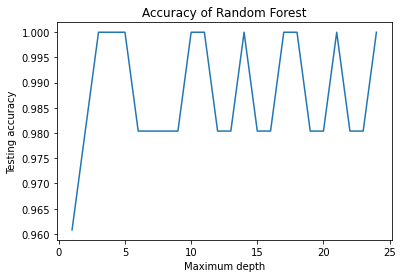

In [20]:
plt.plot(range(1, Dmax),scores_list)
plt.title("Accuracy of Random Forest")
plt.xlabel('Maximum depth')
plt.ylabel('Testing accuracy')  
plt.show()

Cross Validation

In [21]:
clf = RandomForestClassifier(max_depth=3)
rfc_cv = cross_val_score(clf, X, y, cv=5)
print (rfc_cv)
print(f'cv_scores mean: {np.mean(rfc_cv)}')

[0.88235294 1.         1.         1.         1.        ]
cv_scores mean: 0.9764705882352942


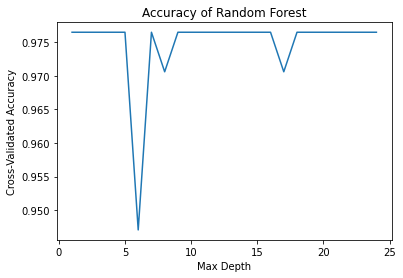

In [22]:
scores_list = []
for d in range(1,Dmax):
    clf = RandomForestClassifier(max_depth=d)
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
    
plt.plot(range(1, Dmax),scores_list)
plt.title("Accuracy of Random Forest")
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## AdaBoost

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [24]:
# Set-up x and y axis and divide into training/ testing sets
x = df.loc[:, df.columns != 'Class'].values
y = df["Class"].values
score_list=[]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

#Create a decision tree
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)

#Train using Adaboosting, see how learning rate affects accuracy
for i in np.arange(0.1, 1.1, 0.1):
    adaclf = AdaBoostClassifier(base_estimator=dtclf,
                                n_estimators=50,
                                learning_rate=i,
                                random_state=1)
    adaclf.fit(X_train, y_train)
    y_pred = adaclf.predict(X_test)
    adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
    score_list.append(adaclf_test_sc)
    
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(cross_val_score(adaclf,x,y,cv=10))



[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[[25  0]
 [ 1 25]]
0.9803921568627451
[0.82352941 0.94117647 1.         1.         1.         1.
 1.         1.         1.         1.        ]

In [25]:
#print out accuracy
adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))

AdaBoost train/test accuracies 1.000/0.980


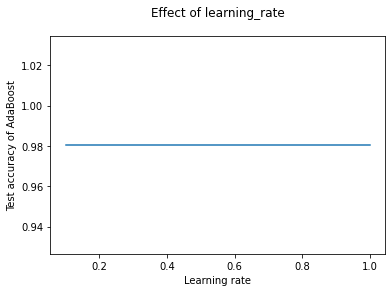

In [26]:

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(np.arange(0.1, 1.1, 0.1), score_list)
plt.show()


Cross Validation

In [27]:
adaclf = AdaBoostClassifier(base_estimator=None,
                                n_estimators=50,
                                learning_rate=i,
                                random_state=1)
ada_cv = cross_val_score(adaclf, x, y, cv=5)
print (ada_cv)
print(f'cv_scores mean: {np.mean(ada_cv)}')

[0.85294118 1.         1.         1.         0.97058824]
cv_scores mean: 0.9647058823529411


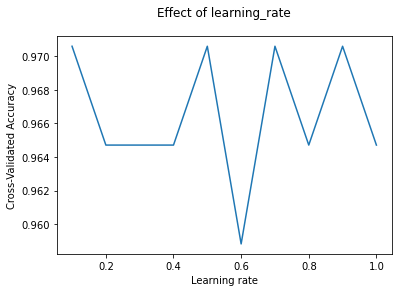

In [28]:
scores_list = []
for i in np.arange(0.1, 1.1, 0.1):
    adaclf = AdaBoostClassifier(base_estimator=None,
                                n_estimators=50,
                                learning_rate=i,
                                random_state=1)
    scores = cross_val_score(adaclf, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
 
plt.plot(np.arange(0.1, 1.1, 0.1),scores_list)
plt.title("Effect of learning_rate", pad=20)
plt.xlabel('Learning rate')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## AdaBoost with 4 features

In [29]:
x = df.iloc[:, 16:20].values
y = df["Class"].values
score_list=[]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

#Create a decision tree
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)

#Train using Adaboosting, see how learning rate affects accuracy
for i in np.arange(0.1, 1.1, 0.1):
    adaclf = AdaBoostClassifier(base_estimator=None,
                                n_estimators=50,
                                learning_rate=i,
                                algorithm='SAMME.R',
                                random_state=1)
    adaclf.fit(X_train, y_train)
    y_pred = adaclf.predict(X_test)
    adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
    score_list.append(adaclf_test_sc)
    
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    #print out accuracy
adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))

[[25  0]
 [ 0 26]]
1.0
[[25  0]
 [ 0 26]]
1.0
[[25  0]
 [ 0 26]]
1.0
[[24  1]
 [ 0 26]]
0.9803921568627451
[[24  1]
 [ 0 26]]
0.9803921568627451
[[24  1]
 [ 0 26]]
0.9803921568627451
[[24  1]
 [ 0 26]]
0.9803921568627451
[[24  1]
 [ 0 26]]
0.9803921568627451
[[24  1]
 [ 0 26]]
0.9803921568627451
[[25  0]
 [ 0 26]]
1.0
AdaBoost train/test accuracies 0.992/1.000


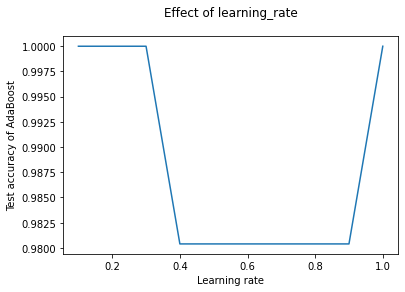

In [30]:

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(np.arange(0.1, 1.1, 0.1), score_list)
plt.show()

Cross Validation

In [31]:
adaclf = AdaBoostClassifier(base_estimator=None,
                                n_estimators=50,
                                learning_rate=i,
                                random_state=1)
ada_cv = cross_val_score(adaclf, x, y, cv=5)
print (ada_cv)
print(f'cv_scores mean: {np.mean(ada_cv)}')

[0.91176471 0.97058824 1.         0.97058824 0.94117647]
cv_scores mean: 0.9588235294117646


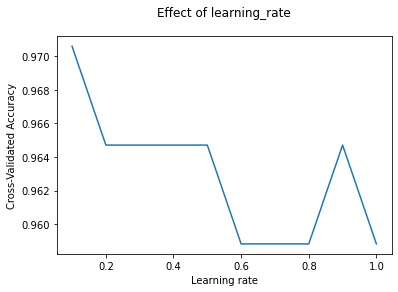

In [32]:
scores_list = []
for i in np.arange(0.1, 1.1, 0.1):
    adaclf = AdaBoostClassifier(base_estimator=None,
                                n_estimators=50,
                                learning_rate=i,
                                random_state=1)
    scores = cross_val_score(adaclf, x, y, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
 
plt.plot(np.arange(0.1, 1.1, 0.1),scores_list)
plt.title("Effect of learning_rate", pad=20)
plt.xlabel('Learning rate')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Main demo function

In [33]:
from features import *

In [34]:
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)

democlf = AdaBoostClassifier(base_estimator=dtclf,
                                n_estimators=50,
                                learning_rate=0.3,
                                algorithm='SAMME.R',
                                random_state=1)
democlf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.3, random_state=1)

In [39]:
answers = []
print ("Input an answer from 0-4 with how likely you are to disagree with the following statements:")
for question in questions2:
    print(question)
    value = int(input("Please input a value from 0-4: "))
    while not 0 <= value <5:
        value = int(input("Please input a value from 0-4: "))
    answers.append(value)
output = democlf.predict(np.reshape(answers, [1, -1]))
if output == 1:
    print("We predict you will likely get divorced")
else:
    print("Congratulations, you will likely not need a divorce!")

Input an answer from 0-4 with how likely you are to disagree with the following statements:
My spouse and I have similar ideas about how roles should be in marriage
My spouse and I have similar values in trust.
I know exactly what my spouse likes.
I know how my spouse wants to be taken care of when she/he sick.
Congratulations, you will likely not need a divorce!
